<a href="https://colab.research.google.com/github/guerrerol/Micro-Credential-Work/blob/main/Unit_3_Mini_Proj_(State_level_covid_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For todays activity,  you will work on completing a project in Python.  You code should be uploaded to your github account.
You may use assistance from google or stackoverflow, however your work should be your own.
You may team up and take your analysis to next level
Make a presentation

COVID 19 Data Analysis
Description: Ingest data from the latest New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 30 days' worth of data for the selected county. Perform EDA and show your findings through different plots and visualization techniques. 


Task 1 : Environment Set up

Task 2 : Data Collection

Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Task4: Understand NY Covid 19 data in last 30 days

Task5: Comparing Covid 19 data with different states

Task6: Conclusion

In [59]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.head(20)


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [60]:
# choose a specific state, NY 
NY = df[df['state'] == 'New York']
len(NY) # 17562 cases 
NY.head(10)

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0
564,2020-03-05,Nassau,New York,36059.0,1,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0
566,2020-03-05,Westchester,New York,36119.0,17,0.0
626,2020-03-06,Nassau,New York,36059.0,4,0.0
627,2020-03-06,New York City,New York,NaN,5,0.0


In [61]:
# Specify county, NYC
NYC = NY[NY['county'] == 'New York City']
len(NYC) # 319 days
NYC.tail(10)

,date,county,state,fips,cases,deaths
896429,2021-01-04,New York City,New York,NaN,450658,25284.0
899674,2021-01-05,New York City,New York,NaN,455997,25309.0
902919,2021-01-06,New York City,New York,NaN,460988,25362.0
906165,2021-01-07,New York City,New York,NaN,467327,25416.0
909410,2021-01-08,New York City,New York,NaN,474339,25453.0
912655,2021-01-09,New York City,New York,NaN,481279,25505.0
915900,2021-01-10,New York City,New York,NaN,487551,25562.0
919145,2021-01-11,New York City,New York,NaN,493306,25635.0
922390,2021-01-12,New York City,New York,NaN,498877,25698.0
925636,2021-01-13,New York City,New York,NaN,504826,25741.0


In [62]:
# set date to be new index, easier to navigate
NYC = NYC.set_index('date')
# Already ran ^^
NYC

,county,state,fips,cases,deaths
date,,,,,
2020-03-01,New York City,New York,NaN,1,0.0
2020-03-02,New York City,New York,NaN,1,0.0
2020-03-03,New York City,New York,NaN,2,0.0
2020-03-04,New York City,New York,NaN,2,0.0
2020-03-05,New York City,New York,NaN,4,0.0
...,...,...,...,...,...
2021-01-09,New York City,New York,NaN,481279,25505.0
2021-01-10,New York City,New York,NaN,487551,25562.0
2021-01-11,New York City,New York,NaN,493306,25635.0


In [63]:
# check data type of 'cases' col, int
NYC.at['2020-03-04','cases'].dtype

dtype('int64')

In [64]:
# to find difference in cases between dates 
# you can use these perhaps w manual ( user ) entry of dates?
def CaseDifference(start, end):
  s = NYC.at[start,'cases'] 
  e = NYC.at[end, 'cases'] 
  return e - s

# to find difference in deaths between dates 
def DeathDifference(start, end):
  s = NYC.at[start,'deaths'] 
  e = NYC.at[end, 'deaths'] 
  return e - s


CaseDifference('2020-03-04','2020-03-05')

2

In [80]:
# alternatively, just add a column for case diff
NYC['case difference'] = NYC["cases"] - NYC["cases"].shift()
# As well as death difference
NYC['death difference'] = NYC["deaths"] - NYC["deaths"].shift()


NYC.tail(20)



,county,state,fips,cases,deaths,case difference,death difference
date,,,,,,,
2020-12-25,New York City,New York,NaN,405857,24889.0,4606.0,47.0
2020-12-26,New York City,New York,NaN,410048,24931.0,4191.0,42.0
2020-12-27,New York City,New York,NaN,413472,24973.0,3424.0,42.0
2020-12-28,New York City,New York,NaN,416922,25008.0,3450.0,35.0
2020-12-29,New York City,New York,NaN,422074,25055.0,5152.0,47.0
2020-12-30,New York City,New York,NaN,426279,25099.0,4205.0,44.0
2020-12-31,New York City,New York,NaN,430863,25144.0,4584.0,45.0
2021-01-01,New York City,New York,NaN,436692,25186.0,5829.0,42.0
2021-01-02,New York City,New York,NaN,442695,25211.0,6003.0,25.0


In [81]:
# df of the last 30 days specifically
NYC30 = NYC.tail(30)
NYC30

,county,state,fips,cases,deaths,case difference,death difference
date,,,,,,,
2020-12-15,New York City,New York,NaN,367198,24561.0,3529.0,35.0
2020-12-16,New York City,New York,NaN,370109,24578.0,2911.0,17.0
2020-12-17,New York City,New York,NaN,373320,24613.0,3211.0,35.0
2020-12-18,New York City,New York,NaN,377728,24652.0,4408.0,39.0
2020-12-19,New York City,New York,NaN,381067,24677.0,3339.0,25.0
2020-12-20,New York City,New York,NaN,383808,24697.0,2741.0,20.0
2020-12-21,New York City,New York,NaN,387595,24735.0,3787.0,38.0
2020-12-22,New York City,New York,NaN,391634,24768.0,4039.0,33.0
2020-12-23,New York City,New York,NaN,395810,24790.0,4176.0,22.0


In [124]:
# To find total cases in past 30 days, you can subtract row 30 cases from row 1
# or sum all of the values in 'case difference' col
TotalCases30 = NYC30['case difference'].sum()
print("Total cases in the past month: " + str(TotalCases30))
TotalDeaths30 = NYC30['death difference'].sum()
print("Total deaths in the past month: " + str(TotalDeaths30))


Total cases in the past month: 141157.0
Total deaths in the past month: 1215.0


In [ ]:
# If you want the user to find cases between a specific timeframe
# ....

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


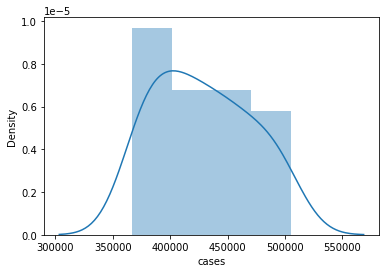

In [83]:
# Data visualization time :3
import seaborn as sns
%matplotlib inline

sns.distplot(NYC30['cases'])
# sns.barplot(NYC30['cases'], x = NYC30.index)

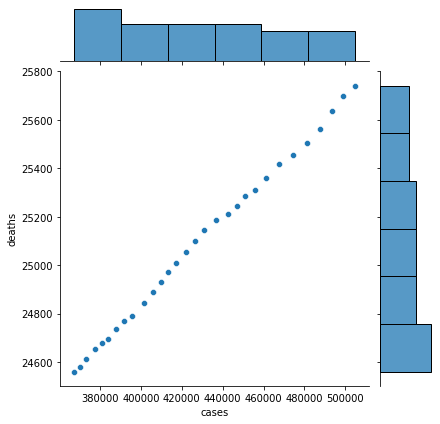

In [129]:
# increasing at v similar rates
sns.jointplot(x='cases', y='deaths', data=NYC30)

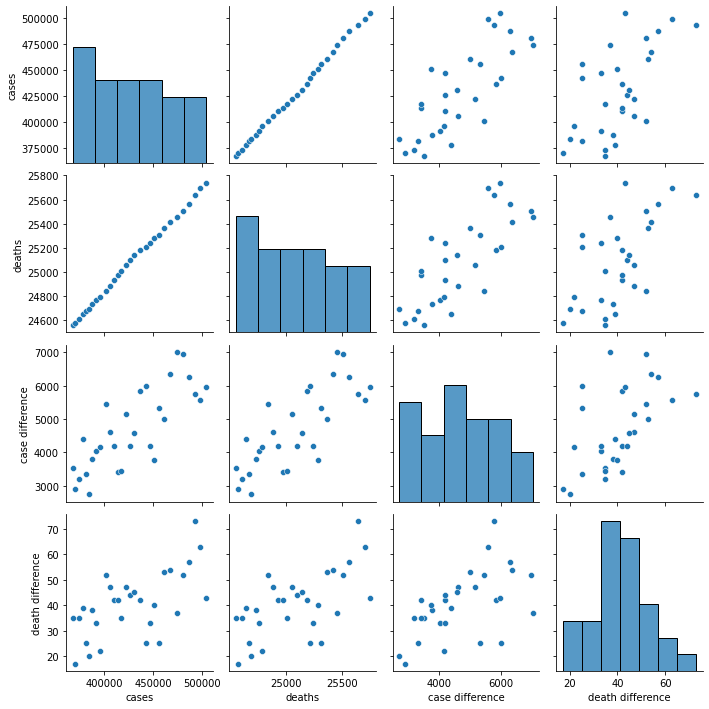

In [88]:
# not necc. useful/easy to interpret
sns.pairplot(NYC30)

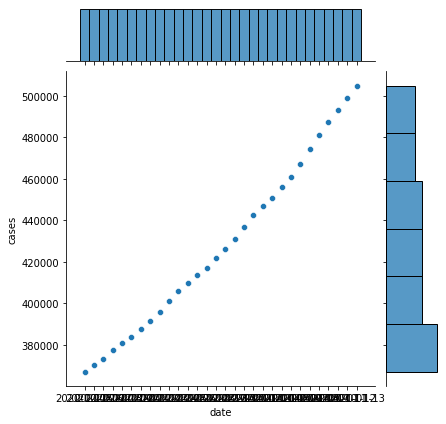

In [94]:
# Case trend
sns.jointplot(x='date', y='cases', data=NYC30)

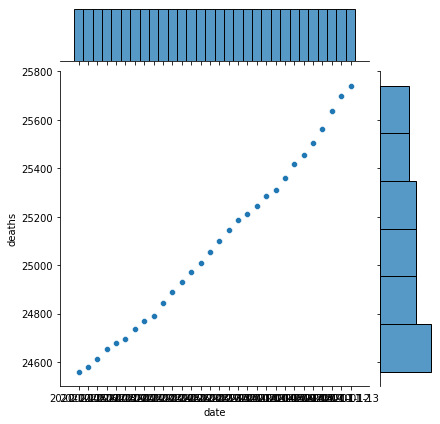

In [95]:
# Death trend
sns.jointplot(x='date', y='deaths', data=NYC30)

In [115]:
# State of california, LA county ( 30 days )

CA30 = df[df['state'] == "California"]
LA30 = CA30[CA30['county'] == 'Los Angeles'].tail(30)
LA30

,date,county,state,fips,cases,deaths
829852,2020-12-15,Los Angeles,California,6037.0,543949,8431.0
833099,2020-12-16,Los Angeles,California,6037.0,566185,8568.0
836345,2020-12-17,Los Angeles,California,6037.0,580505,8664.0
839590,2020-12-18,Los Angeles,California,6037.0,596910,8757.0
842835,2020-12-19,Los Angeles,California,6037.0,610562,8817.0
846081,2020-12-20,Los Angeles,California,6037.0,623875,8875.0
849326,2020-12-21,Los Angeles,California,6037.0,635058,8931.0
852571,2020-12-22,Los Angeles,California,6037.0,647766,9016.0
855816,2020-12-23,Los Angeles,California,6037.0,664193,9153.0
859061,2020-12-24,Los Angeles,California,6037.0,677538,9299.0


In [113]:
# State of NY, last 30 days
#NY30 = df[df['state'] == "New York"]
#NY30

In [116]:
# State of AK, Anchorage ( last 30 days )
AK30 = df[df['state'] == "Alaska"]
AN30 = AK30[AK30['county'] == 'Anchorage'].tail(30)
AN30

,date,county,state,fips,cases,deaths
829717,2020-12-15,Anchorage,Alaska,2020.0,20616,99.0
832964,2020-12-16,Anchorage,Alaska,2020.0,20883,101.0
836210,2020-12-17,Anchorage,Alaska,2020.0,21084,103.0
839455,2020-12-18,Anchorage,Alaska,2020.0,21283,103.0
842700,2020-12-19,Anchorage,Alaska,2020.0,21429,104.0
845946,2020-12-20,Anchorage,Alaska,2020.0,21554,104.0
849191,2020-12-21,Anchorage,Alaska,2020.0,21645,104.0
852436,2020-12-22,Anchorage,Alaska,2020.0,21857,112.0
855681,2020-12-23,Anchorage,Alaska,2020.0,22013,115.0
858926,2020-12-24,Anchorage,Alaska,2020.0,22124,116.0


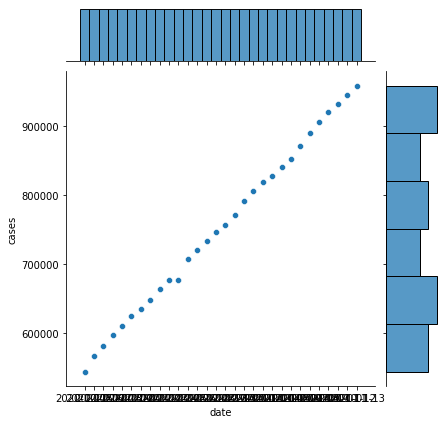

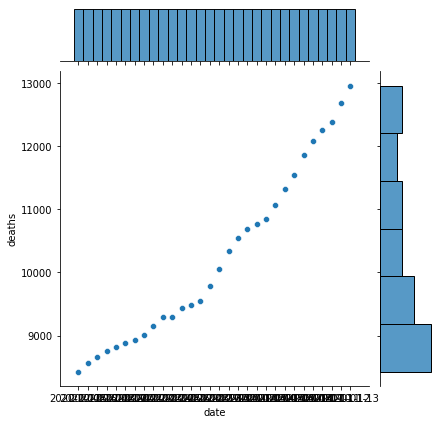

In [132]:
# Graph of LA cases, past 30 days
# Linear case increase
sns.jointplot(x='date', y='cases', data=LA30)
# Deaths increasing at a (slightly) increasing rate
sns.jointplot(x='date', y='deaths', data=LA30)

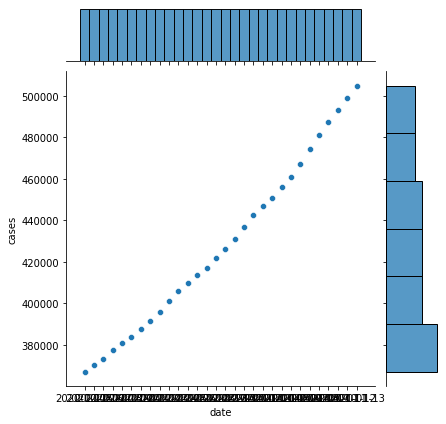

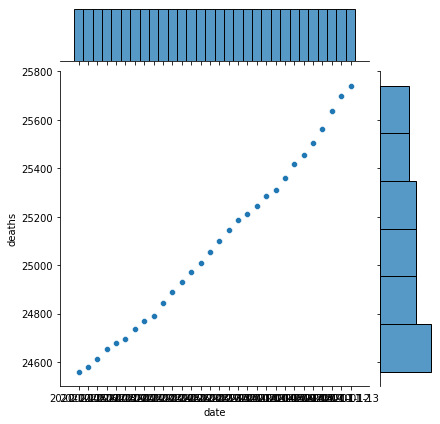

In [131]:
# Graph of NYC cases, past 30 days
# Cases are increasing ( more or less ) linearly
sns.jointplot(x='date', y='cases', data=NYC30)
# death graph v similar to case graph
sns.jointplot(x='date', y='deaths', data=NYC30)

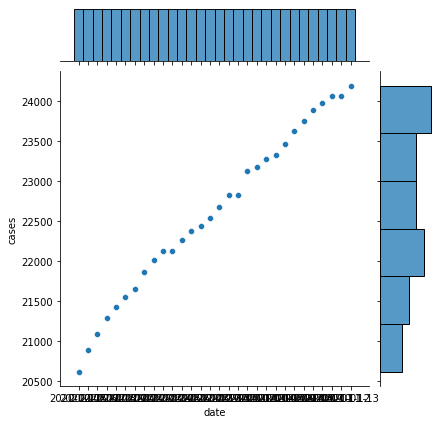

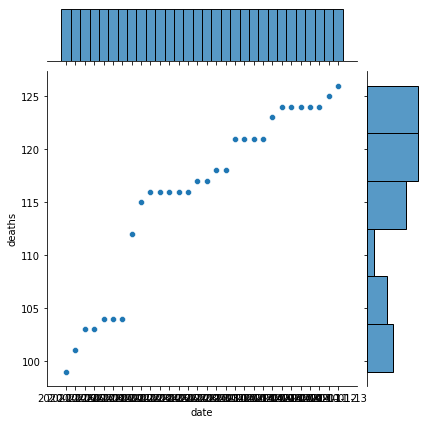

In [130]:
# Graph of AN cases, past 30 days
# Cases are increasing at a ( slightly ) decreasing rate
sns.jointplot(x='date', y='cases', data=AN30)
# many periods of multiple days w/o deaths, followed by a jump in deaths
sns.jointplot(x='date', y='deaths', data=AN30)

In [119]:
# add case and death diff col for every city 
#NYC30['case difference'] = NYC30["cases"] - NYC30["cases"].shift()
#NYC30['death difference'] = NYC30["deaths"] - NYC30["deaths"].shift()
# ^^ already done

AN30['case difference'] = AN30["cases"] - AN30["cases"].shift()
AN30['death difference'] = AN30["deaths"] - AN30["deaths"].shift()

LA30['case difference'] = LA30["cases"] - LA30["cases"].shift()
LA30['death difference'] = LA30["deaths"] - LA30["deaths"].shift()

In [123]:
# Explicit data
NYCCases30 = NYC30['case difference'].sum()
ANCases30 = AN30['case difference'].sum()
LACases30 = LA30['case difference'].sum()

NYCDeaths30 = NYC30['death difference'].sum()
ANDeaths30 = AN30['death difference'].sum()
LADeaths30 = LA30['death difference'].sum()

print("New Yorks's total cases in the past month: " + str(NYCCases30))
print("New York's total deaths in the past month: " + str(NYCDeaths30))


print("\nAlaska's total cases in the past month: " + str(ANCases30))
print("Alaska's total deaths in the past month: " + str(ANDeaths30))


print("\nCalifornia's total cases in the past month: " + str(LACases30))
print("California's total deaths in the past month: " + str(LADeaths30))

New Yorks's total cases in the past month: 141157.0
New York's total deaths in the past month: 1215.0

Alaska's total cases in the past month: 3577.0
Alaska's total deaths in the past month: 27.0

California's total cases in the past month: 414942.0
California's total deaths in the past month: 4524.0


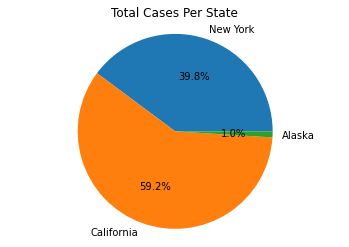

In [134]:
# NY, CA, AK state-level comparisons ( whole year )

import matplotlib.pyplot as plt
nys = df[df['state'] == "New York"]
nyscasestotal = nys['cases'].sum()
cali = df[df['state'] == "California"]
calicasestotal = cali['cases'].sum()
alas = df[df['state'] == "Alaska"]
alascasestotal = alas['cases'].sum()

my_data = [nyscasestotal,calicasestotal,alascasestotal]
my_labels = 'New York','California','Alaska'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Total Cases Per State')
plt.axis('equal')
plt.show()

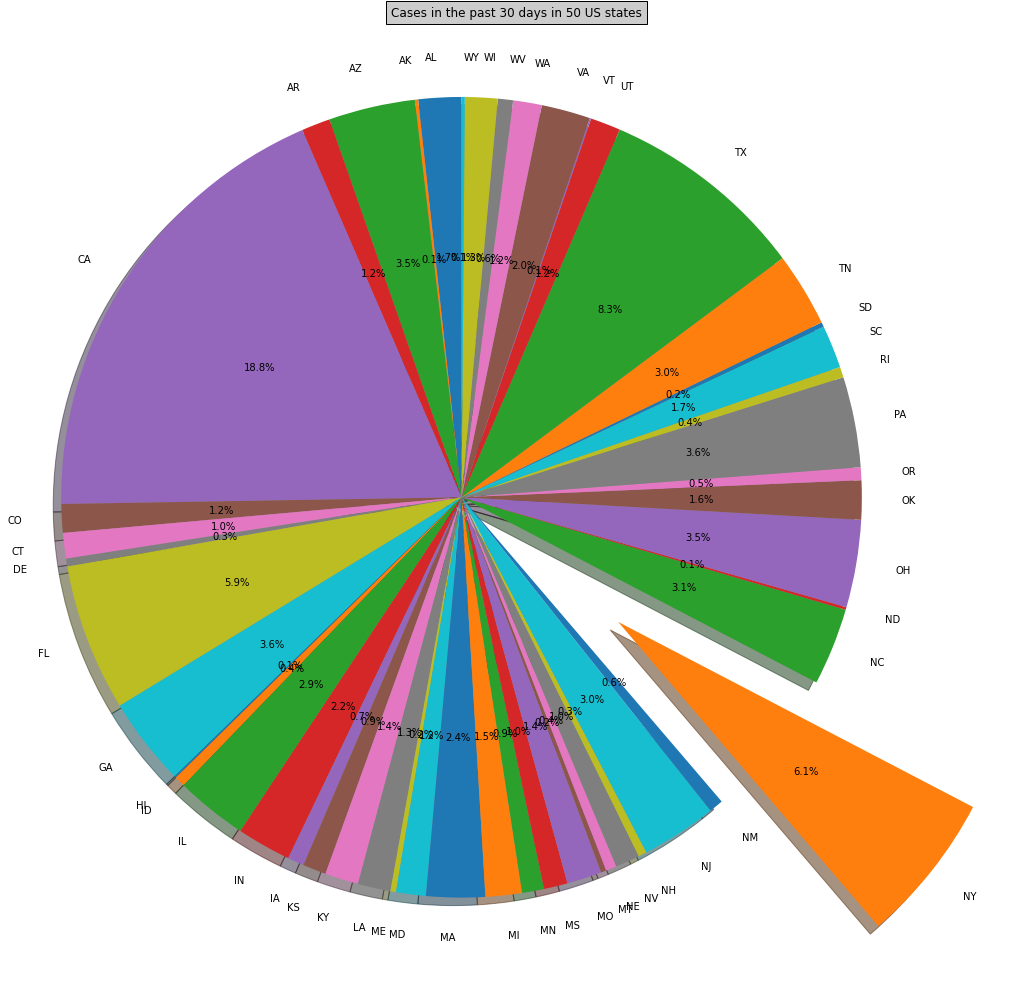

In [133]:
# Group contribution, visualization of all 50 states for past month
from datetime import date, timedelta

yesterday = (date.today()-timedelta(days=2)).isoformat()
thirtydaysago = (date.today()-timedelta(days=30)).isoformat()
us_states =["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

abbr_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA","HI", "ID", 
               "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO",
               "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
               "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

cases_us_states=[]
for i in us_states:
    currState = df[df['state'] == i]

    cases_us_states.append(((currState['cases'].where(currState["date"]==yesterday)).sum())-((currState['cases'].where(currState["date"]==thirtydaysago)).sum()))

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(cases_us_states, explode=explode, labels=abbr_states, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(18,18) # or (4,4) or (5,5) or whatever
plt.title("Cases in the past 30 days in 50 US states" ,bbox={'facecolor':'0.8', 'pad':5})

plt.show()


In the future, I could add functions that allow for user to manually wrangle data by different criteria ( timeframes, location, case/death count, etc ), to increase the program's usefulness :~)